In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                      transform=transforms.Compose([
                          transforms.ToTensor()
                      ]))

test = datasets.MNIST('', train=True, download=True,
                      transform=transforms.Compose([
                          transforms.ToTensor()
                      ]))

train_set = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

C:\Users\gabriel.paoli\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
import torch.nn as nn
import torch.nn.functional as F

é necessario colocar super init pq se não o init que seria herdado nao é utilizado

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)        
        self.fc3 = nn.Linear(64, 64)        
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        # You can use if and else logic here
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


28*28 -> resolução da imagem (número de valores que serão entregues aos neuronios

1o 64 -> número de resultados recebidos pelos neuronios anteriores

2o 64 -> Tantofaz

10 -> Número de labels únicas

In [4]:
X = torch.randn((28, 28))
X = X.view(-1, 28*28)

output = net(X)
output

tensor([[-2.3724, -2.3343, -2.3277, -2.3316, -2.3145, -2.2718, -2.4213, -2.2581,
         -2.2982, -2.1247]], grad_fn=<LogSoftmaxBackward>)

In [5]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in train_set:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.1095, grad_fn=<NllLossBackward>)
tensor(0.0389, grad_fn=<NllLossBackward>)
tensor(0.0002, grad_fn=<NllLossBackward>)


In [6]:
correct = 0
total = 0

with torch.no_grad() as mousse:
    for data in train_set:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct / total, 3))

Accuracy:  0.972


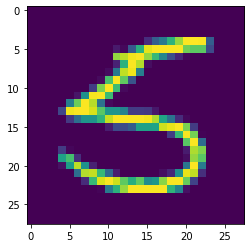

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28, 28))
plt.show()

In [8]:
print(torch.argmax(net(X[0].view(-1, 28*28))[0]))

tensor(5)


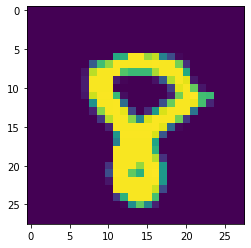

In [9]:
plt.imshow(X[1].view(28, 28))

In [10]:
print(torch.argmax(net(X[1].view(-1, 28*28))[0]))

tensor(8)
